In [1]:
import math
import numpy as np
import pandas as pd
import bagpipes as pipes
from astropy.table import Table
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib as mpl

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
from matplotlib import rc
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["figure.figsize"] = (13,11)
plt.rcParams["font.size"] = 18
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.labelsize"] = 13
plt.rcParams["ytick.labelsize"] = 13
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams['axes.linewidth'] = 2.0

In [2]:
filter_list = ['filters/PANDA/PLW.dat','filters/PANDA/PMW.dat', 'filters/PANDA/PSW.dat', 'filters/PANDA/100.dat', 'filters/PANDA/160.dat', 
               'filters/PANDA/spitzer.mips.24.dat', 
               'filters/PANDA/WISE4.dat', 'filters/PANDA/WISE3.dat', 'filters/PANDA/WISE2.dat', 'filters/PANDA/WISE1.dat', 
               'filters/PANDA/Ks_2mass.dat', 'filters/PANDA/H_2mass.dat', 'filters/PANDA/J_2mass.dat', 
               'filters/PANDA/PAN-STARRS_y.dat', 
               'filters/PANDA/z_prime.dat', 'filters/PANDA/i_prime.dat', 'filters/PANDA/r_prime.dat', 'filters/PANDA/g_prime.dat', 'filters/PANDA/u_prime.dat',  
               'filters/PANDA/NUV.dat', 'filters/PANDA/FUV.dat'
               ]

mags = ['herschel.spire.PLW', 'herschel.spire.PMW', 'herschel.spire.PSW', 'herschel.pacs.160', 'herschel.pacs.100', 
        'spitzer.mips.24', 
        'WISE4', 'WISE3', 'WISE2', 'WISE1', 
        '2mass.Ks', '2mass.H', '2mass.J', 
        'PAN-STARRS_y', 
        'SDSS.z', 'SDSS.i', 'SDSS.r', 'SDSS.g', 'SDSS.u', 
        'galex.NUV', 'galex.FUV', 
        ]

mags_err = ['herschel.spire.PLW_err', 'herschel.spire.PMW_err', 'herschel.spire.PSW_err', 'herschel.pacs.160_err', 'herschel.pacs.100_err', 
            'spitzer.mips.24_err', 
            'WISE4_err', 'WISE3_err', 'WISE2_err', 'WISE1_err', 
            '2mass.Ks_err', '2mass.H_err', '2mass.J_err', 
            'PAN-STARRS_y_err', 
            'SDSS.z_err', 'SDSS.i_err', 'SDSS.r_err', 'SDSS.g_err', 'SDSS.u_err', 
            'galex.NUV_err', 'galex.FUV_err', 
            ]



def load_data_manga(id):
        print(id)
        # try:
        #     object, field = id.split('_')
        # except:
        #     object1, object2, field = id.split('_')
        #     object = object1 + '_' + object2

        fluxes = []
        fluxerrs = []
        galaxy_param = df[(df['id'] == id)]
        #print(galaxy_param[mags])
        #print(galaxy_param[mags_err])

        for k in range(0, len(mags)):
            f = galaxy_param[mags[k]]
            delta_f = galaxy_param[mags_err[k]]
            if (math.isnan(f.values)) | (f.values == np.inf) | (f.values == 99.) | (f.values == -99.):
                f = np.array([99.])
                delta_f = np.array([99.])
            # else:
            #     f = 10**(9.56) * 10**(-m/2.5)  # flux in mJy
            #     delta_m = galaxy_param[mags_err[k]]
            #     delta_f = f * (1/2.5) * np.log(10) * delta_m

            #print(m, delta_m, f, delta_f)

            fluxes.append(f)  #mJy
            fluxerrs.append(delta_f)  #mJy
        photometry = np.c_[fluxes, fluxerrs]

        print(photometry)
        print(len(photometry))
        return photometry

In [3]:
delayed = {}
delayed["age"] = (0.001, 13.) # Time since SF began: Gyr
delayed["tau"] = (0.001, 13.) # timescale of the decaying
delayed["massformed"] = (6., 13.) # total stellar mass formed during this period of time
delayed["metallicity"] = (0., 1.) # Z/Z_solar = 0.02

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0., 4.)
dust["eta"] = 3. #factor of birth clouds

nebular = {}
nebular["logU"] = (-4,-2)

model_delayed = {}
model_delayed["t_bc"] = 0.01           # Max age of birth clouds: Gyr
model_delayed["dust"] = dust
model_delayed["nebular"] = nebular
model_delayed["delayed"] = delayed

##########################################################################################################################################

dblplaw = {}                         # double-power-law
dblplaw["tau"] = (0., 15.) # Vary the time of peak star-formation between the Big Bang at 0 Gyr and 15 Gyr later.
                           # In practice the code automatically stops this exceeding the age of the universe at the
                           # observed redshift.
dblplaw["alpha"] = (0.01, 1000.)          # Vary the falling power law slope from 0.01 to 1000.
dblplaw["beta"] = (0.01, 1000.)           # Vary the rising power law slope from 0.01 to 1000.
dblplaw["alpha_prior"] = "log_10"         # Impose a prior which is uniform in log_10 of the 
dblplaw["beta_prior"] = "log_10"          # parameter between the limits which have been set above as 
                                          # in Carnall et al. (2017).
dblplaw["massformed"] = (4., 13.) # total stellar mass formed during this period of time
dblplaw["metallicity"] = (0., 2.5) # Z/Z_solar = 0.02
dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0., 4.)
dust["eta"] = 3. #factor of birth clouds
nebular = {}
nebular["logU"] = (-4,-2)
model_dblplaw = {}
model_dblplaw["t_bc"] = 0.01           # Max age of birth clouds: Gyr
model_dblplaw["dust"] = dust
model_dblplaw["nebular"] = nebular
model_dblplaw["dblplaw"] = dblplaw

3C286
[[9.22000000e+01 1.25402711e+01]
 [8.70000000e+01 1.19553335e+01]
 [7.18000000e+01 1.04552571e+01]
 [7.03000000e+01 4.59410590e+01]
 [6.16000000e+01 4.40330058e+01]
 [7.86000000e+00 7.86254412e-01]
 [9.56000000e+00 1.34072219e+00]
 [3.03000000e+00 3.29710479e-01]
 [1.71000000e+00 1.75616058e-01]
 [1.20000000e+00 1.23693169e-01]
 [9.45000000e-01 1.09846484e-01]
 [5.86000000e-01 8.97661406e-02]
 [6.62000000e-01 7.68338467e-02]
 [5.65000000e-01 5.65795900e-02]
 [5.46000000e-01 5.49286810e-02]
 [4.76000000e-01 4.76944441e-02]
 [4.47000000e-01 4.47447204e-02]
 [4.26000000e-01 4.26469225e-02]
 [3.59000000e-01 3.60251301e-02]
 [3.00000000e-01 3.16227766e-02]
 [9.26000000e-02 1.27058097e-02]]
21


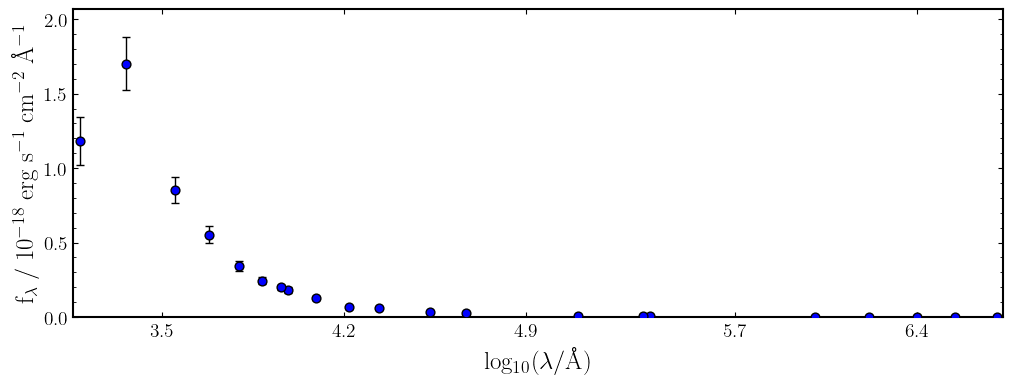

/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:270: RuntimeWarning: overflow encountered in power
  sfr[mask] = ((t/tau)**alpha + (t/tau)**-beta)**-1



Results loaded from pipes/posterior/3C286_dblplaw/3C286.h5

Fitting not performed as results have already been loaded from pipes/posterior/3C286_dblplaw/3C286.h5. To start over delete this file or change run.


Results loaded from pipes/posterior/3C286_delayed/3C286.h5

Fitting not performed as results have already been loaded from pipes/posterior/3C286_delayed/3C286.h5. To start over delete this file or change run.



In [7]:
# %reload_ext autoreload

id = '3C286'
df = pd.read_csv('data/MaNGA_AGNs.csv')
df = df[df['id']==id]  
redshift = df['redshift'].values[0]
model_delayed["redshift"] = redshift
model_dblplaw["redshift"] = redshift
galaxy = pipes.galaxy(id, load_data_manga, spectrum_exists=False, filt_list=filter_list, index_redshift=redshift)

fig = galaxy.plot()

fit_dblplaw = pipes.fit(galaxy, model_dblplaw, run=id+'_dblplaw')
fit_dblplaw.fit(verbose=False)

fit_delayed = pipes.fit(galaxy, model_delayed, run=id+'_delayed')
fit_delayed.fit(verbose=False)


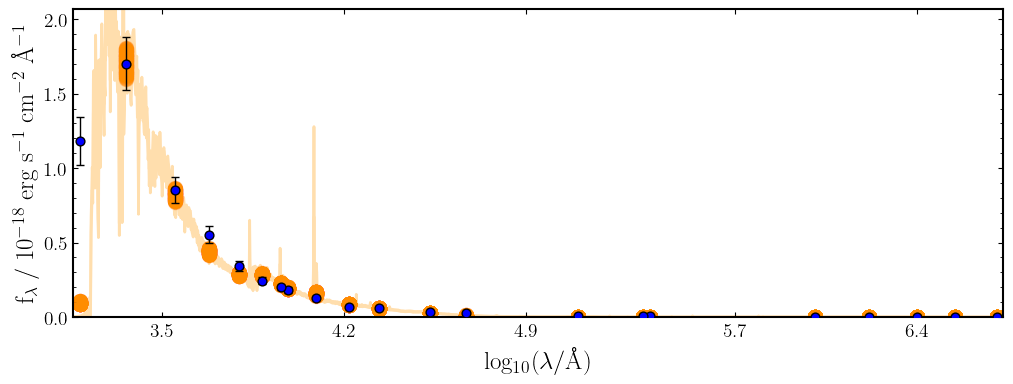

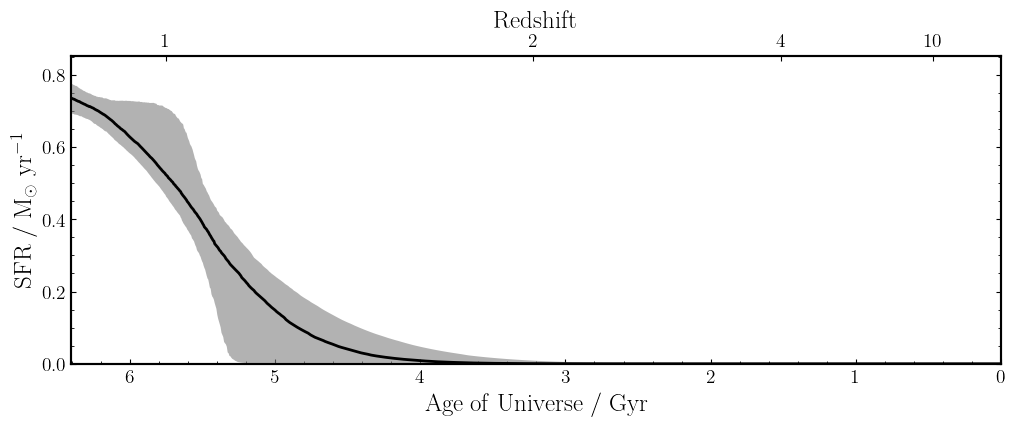

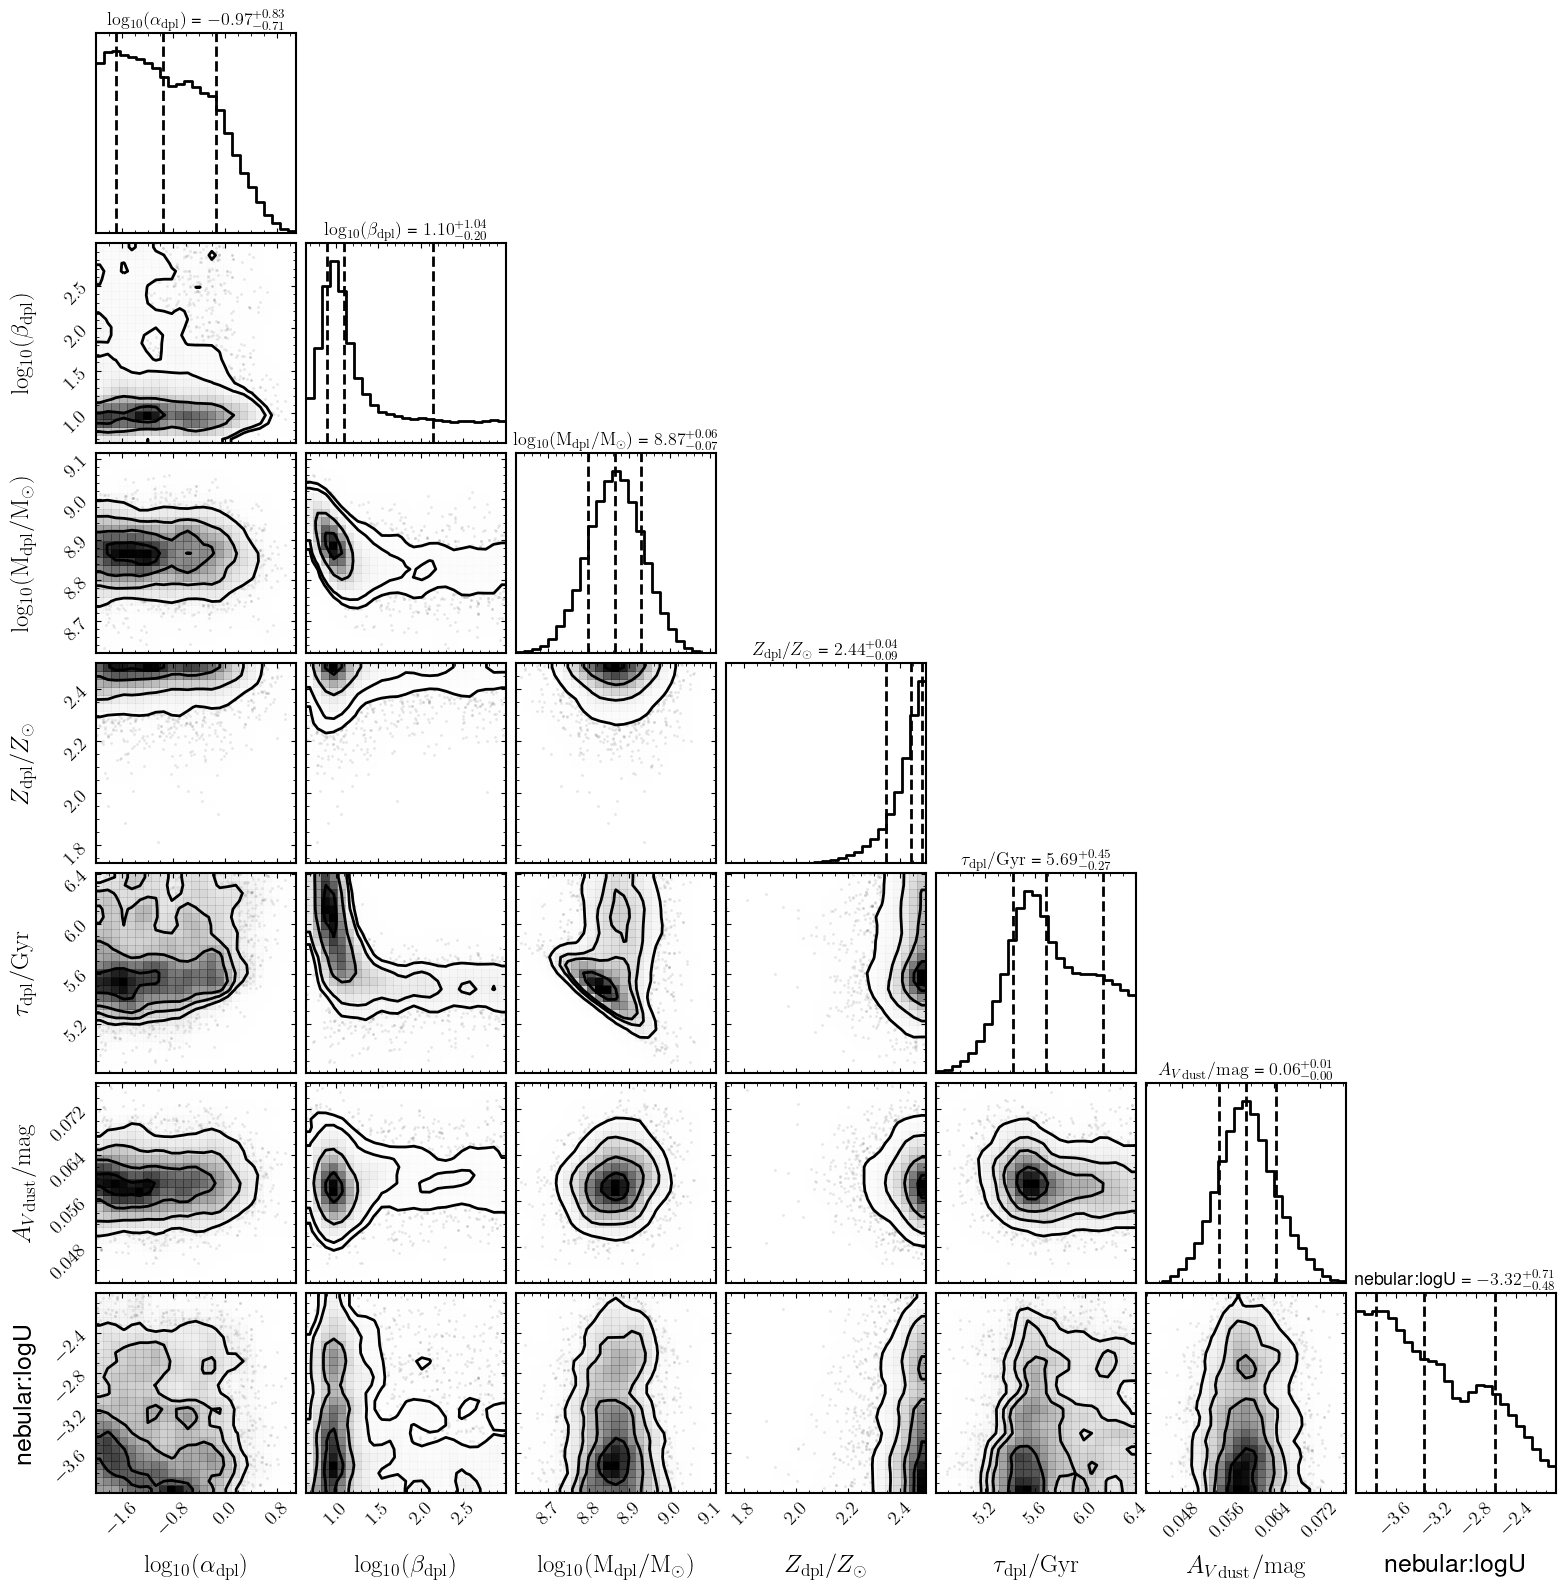

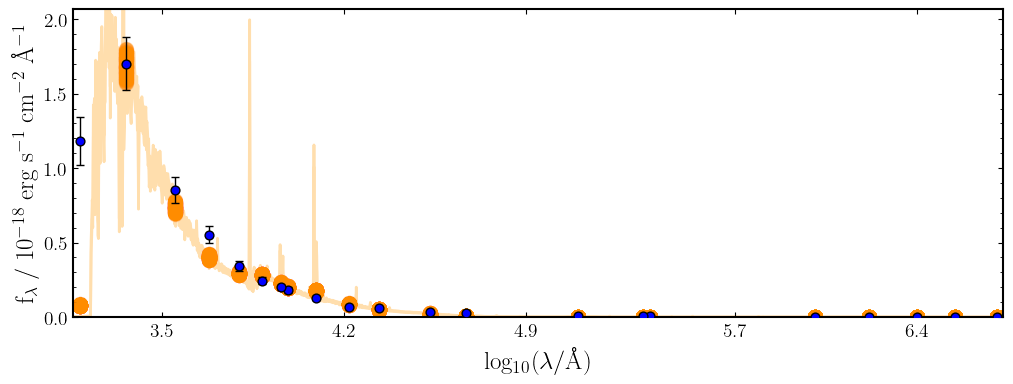

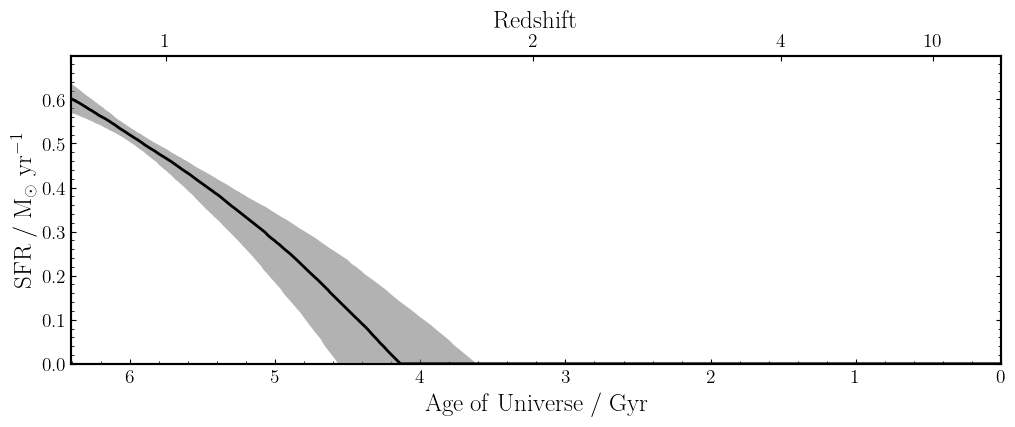

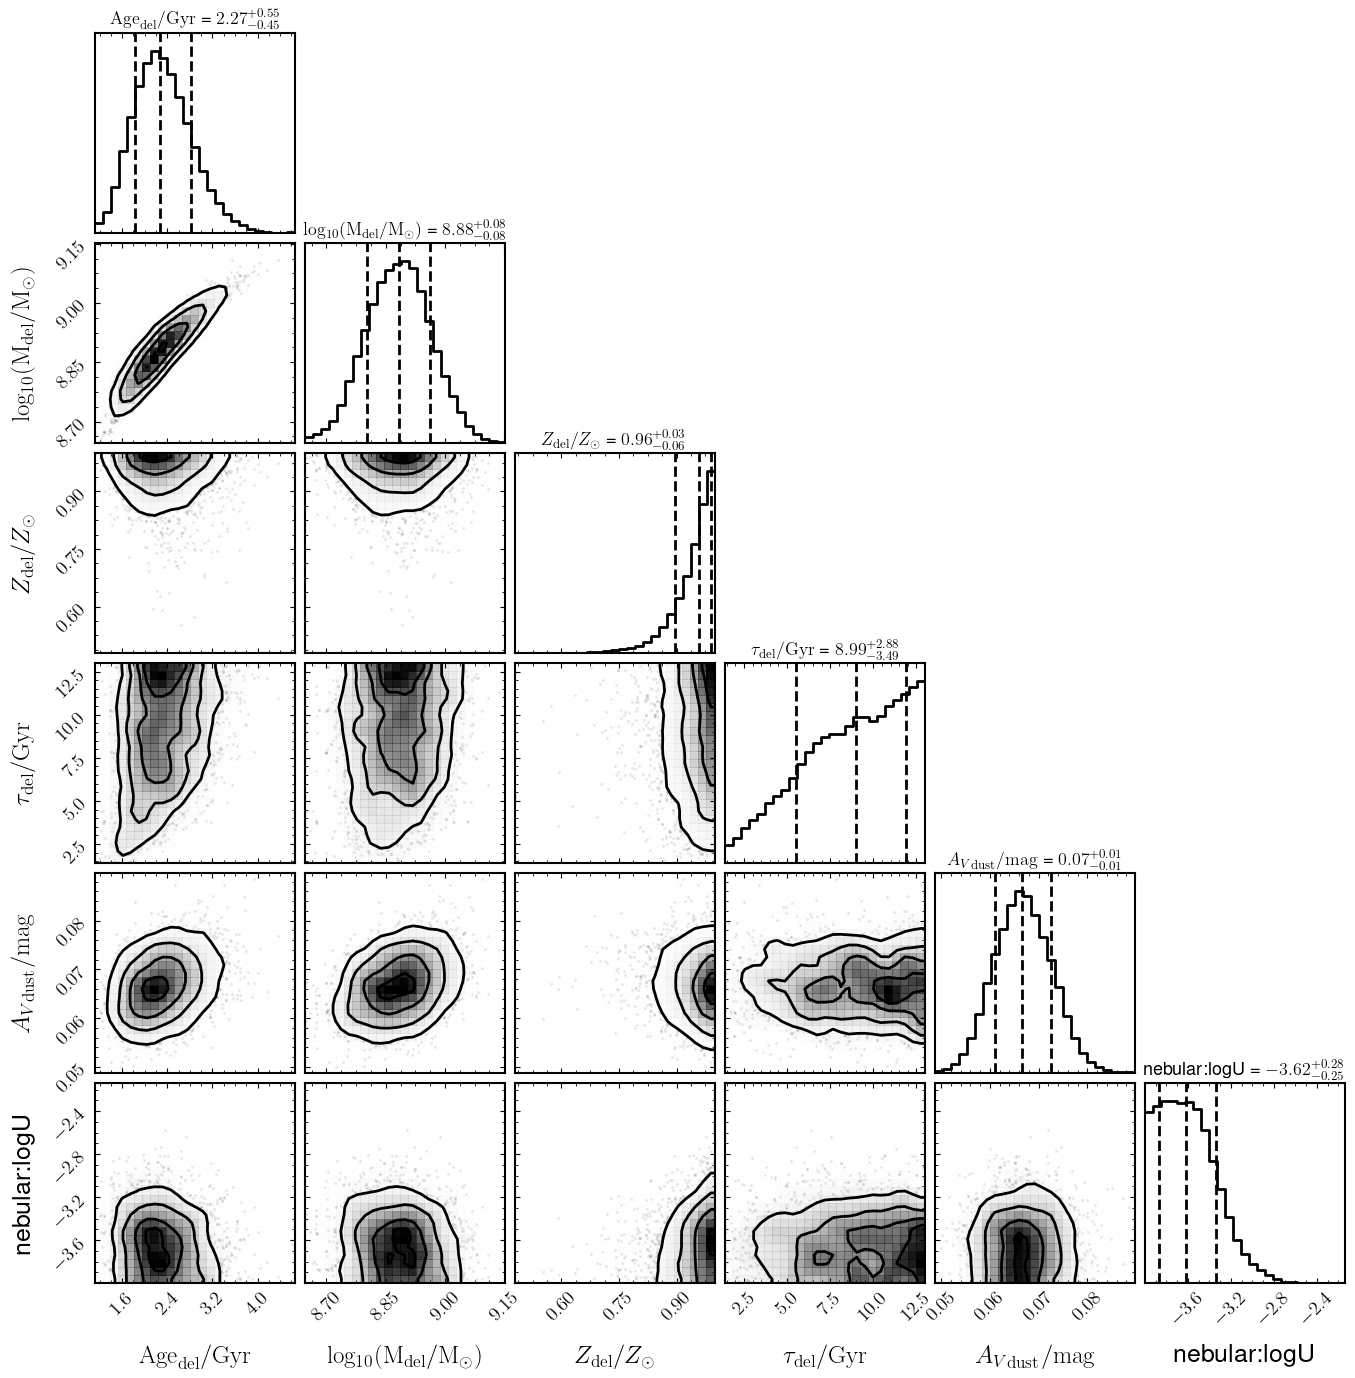

In [8]:
fig = fit_dblplaw.plot_spectrum_posterior(save=False, show=True)
fig = fit_dblplaw.plot_sfh_posterior(save=False, show=True)
fig = fit_dblplaw.plot_corner(save=False, show=True)

fig = fit_delayed.plot_spectrum_posterior(save=False, show=True)
fig = fit_delayed.plot_sfh_posterior(save=False, show=True)
fig = fit_delayed.plot_corner(save=False, show=True)

SDSSJ173052.72+602516.7
[[4.59000000e+00 7.83521538e-01]
 [2.57000000e+00 2.72303140e-01]
 [1.72350000e+00 1.73506549e-01]
 [1.14750000e+00 1.47893382e-01]
 [4.37000000e-01 1.01851313e-01]
 [5.73000000e-01 9.43837380e-02]
 [4.47000000e-01 6.27223246e-02]
 [2.83000000e-01 2.87383020e-02]
 [4.32850000e-01 4.37807735e-02]
 [3.58400000e-01 3.58957602e-02]
 [3.24600000e-01 3.25215559e-02]
 [2.74200000e-01 2.74382288e-02]
 [1.81800000e-01 1.82896802e-02]
 [1.38500000e-01 1.50937901e-02]
 [4.93000000e-02 7.53623912e-03]
 [1.14500000e+02 1.17305158e+01]]
16


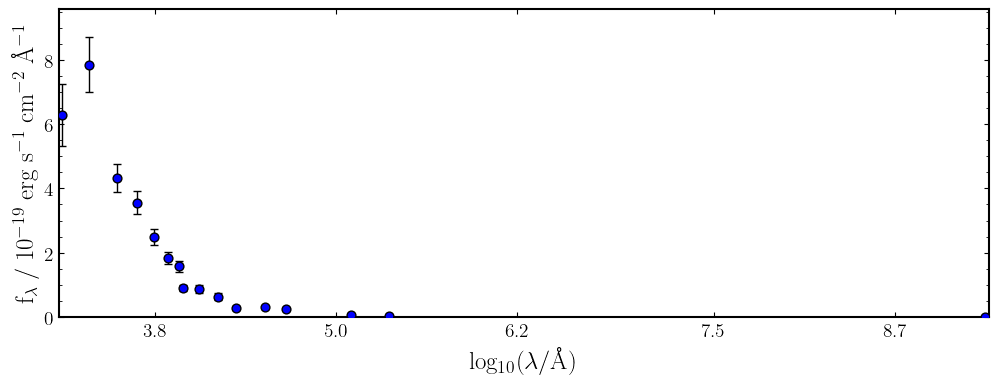


Results loaded from pipes/posterior/SDSSJ173052.72+602516.7_dblplaw/SDSSJ173052.72+602516.7.h5

Fitting not performed as results have already been loaded from pipes/posterior/SDSSJ173052.72+602516.7_dblplaw/SDSSJ173052.72+602516.7.h5. To start over delete this file or change run.


Results loaded from pipes/posterior/SDSSJ173052.72+602516.7_delayed/SDSSJ173052.72+602516.7.h5

Fitting not performed as results have already been loaded from pipes/posterior/SDSSJ173052.72+602516.7_delayed/SDSSJ173052.72+602516.7.h5. To start over delete this file or change run.



/home/edrok/.local/lib/python3.8/site-packages/matplotlib/ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/edrok/.local/lib/python3.8/site-packages/matplotlib/ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:270: RuntimeWarning: overflow encountered in power
  sfr[mask] = ((t/tau)**alpha + (t/tau)**-beta)**-1


Done writing dict to a csv file
Done writing dict to a csv file


In [25]:
# Getting data from main table of a individual galaxy
id = 'SDSSJ173052.72+602516.7'
df = pd.read_csv('data/MaNGA_AGNs.csv')
df = df[df['id']==id]  

# Rewriting filter list, mags, mags_err to specific galaxy
filter_list = ['filters/PANDA/WISE4.dat', 'filters/PANDA/WISE3.dat', 'filters/PANDA/WISE2.dat', 'filters/PANDA/WISE1.dat', 
               'filters/PANDA/Ks_2mass.dat', 'filters/PANDA/H_2mass.dat', 'filters/PANDA/J_2mass.dat', 
               'filters/PANDA/PAN-STARRS_y.dat', 
               'filters/PANDA/z_prime.dat', 'filters/PANDA/i_prime.dat', 'filters/PANDA/r_prime.dat', 'filters/PANDA/g_prime.dat', 'filters/PANDA/u_prime.dat',  
               'filters/PANDA/NUV.dat', 'filters/PANDA/FUV.dat', 
               'filters/PANDA/VLA_L.dat']

mags = ['WISE4', 'WISE3', 'WISE2', 'WISE1', 
        '2mass.Ks', '2mass.H', '2mass.J', 
        'PAN-STARRS_y', 
        'SDSS.z', 'SDSS.i', 'SDSS.r', 'SDSS.g', 'SDSS.u', 
        'galex.NUV', 'galex.FUV', 
        'VLA_L']

mags_err = ['WISE4_err', 'WISE3_err', 'WISE2_err', 'WISE1_err', 
            '2mass.Ks_err', '2mass.H_err', '2mass.J_err', 
            'PAN-STARRS_y_err', 
            'SDSS.z_err', 'SDSS.i_err', 'SDSS.r_err', 'SDSS.g_err', 'SDSS.u_err', 
            'galex.NUV_err', 'galex.FUV_err', 
            'VLA_L_err']
# Chaging reddshift of the model
redshift = df['redshift'].values[0]
model_delayed["redshift"] = redshift
model_dblplaw["redshift"] = redshift

# Building galaxy object with the data, filter list and redshift
galaxy = pipes.galaxy(id, load_data_manga, spectrum_exists=False, filt_list=filter_list, index_redshift=redshift)
fig = galaxy.plot()

# Fitting different models
fit_dblplaw = pipes.fit(galaxy, model_dblplaw, run=id+'_dblplaw')
fit_dblplaw.fit(verbose=False)

fit_delayed = pipes.fit(galaxy, model_delayed, run=id+'_delayed')
fit_delayed.fit(verbose=False)
# Saving figures of each model
# fig = fit_dblplaw.plot_spectrum_posterior(save=True, show=True)
fig = fit_dblplaw.plot_sfh_posterior(save=True, show=True)
fig = fit_dblplaw.plot_corner(save=True, show=True)

# fig = fit_delayed.plot_spectrum_posterior(save=True, show=True)
fig = fit_delayed.plot_sfh_posterior(save=True, show=True)
fig = fit_delayed.plot_corner(save=True, show=True)
# Saving posterior results dictionaries in csv files
fit_dblplaw.posterior.get_advanced_quantities()
r_dblplaw = fit_dblplaw.posterior.samples
with open("pipes/posterior/"+id+"_dblplaw/posterior_dict.csv", "w", newline="") as fp:
    # Create a writer object
    writer = csv.DictWriter(fp, fieldnames=r_dblplaw.keys())
    # Write the header row
    writer.writeheader()
    # Write the data rows
    writer.writerow(r_dblplaw)
    print('Done writing dict to a csv file')


fit_delayed.posterior.get_advanced_quantities()
r_delayed = fit_delayed.posterior.samples
with open("pipes/posterior/"+id+"_delayed/posterior_dict.csv", "w", newline="") as fp:
    # Create a writer object
    writer = csv.DictWriter(fp, fieldnames=r_delayed.keys())
    # Write the header row
    writer.writeheader()
    # Write the data rows
    writer.writerow(r_delayed)
    print('Done writing dict to a csv file')

In [22]:
fit_delayed.posterior.get_advanced_quantities()
r = fit_delayed.posterior.samples

import csv
with open("dict.csv", "w", newline="") as fp:
    # Create a writer object
    writer = csv.DictWriter(fp, fieldnames=r.keys())

    # Write the header row
    writer.writeheader()

    # Write the data rows
    writer.writerow(r)
    print('Done writing dict to a csv file')

Done writing dict to a csv file


In [25]:
IDs = df['id']
redshifts = df['redshift']
fit_cat = pipes.fit_catalogue(IDs, model_components, load_data_manga, spectrum_exists=False,
                              cat_filt_list=filter_list, run="manga_delayed2", make_plots=True,
                              full_catalogue=True, redshifts=redshifts)
                              
fit_cat.fit(verbose=False)

3C286
[[9.22000000e+01 1.25402711e+01]
 [8.70000000e+01 1.19553335e+01]
 [7.18000000e+01 1.04552571e+01]
 [7.03000000e+01 4.59410590e+01]
 [6.16000000e+01 4.40330058e+01]
 [7.86000000e+00 7.86254412e-01]
 [9.56000000e+00 1.34072219e+00]
 [3.03000000e+00 3.29710479e-01]
 [1.71000000e+00 1.75616058e-01]
 [1.20000000e+00 1.23693169e-01]
 [9.45000000e-01 1.09846484e-01]
 [5.86000000e-01 8.97661406e-02]
 [6.62000000e-01 7.68338467e-02]
 [5.65000000e-01 5.65795900e-02]
 [5.46000000e-01 5.49286810e-02]
 [4.76000000e-01 4.76944441e-02]
 [4.47000000e-01 4.47447204e-02]
 [4.26000000e-01 4.26469225e-02]
 [3.59000000e-01 3.60251301e-02]
 [3.00000000e-01 3.16227766e-02]
 [9.26000000e-02 1.27058097e-02]]
21

Bagpipes: fitting object 3C286

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 ********************

/home/edrok/.local/lib/python3.8/site-packages/matplotlib/ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


Bagpipes: 1 out of 1 objects completed.
